# Market Segmentation Case Study in Python
**Apurba Das** 

## 1. Import necessary Libraries

In [266]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 2. Loading the dataset

In [267]:
data=pd.read_csv("mcdonalds.csv")

In [268]:
print(data.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [269]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


## 3. Exploring the Dataset

In [270]:
print(data.shape)

(1453, 15)


In [271]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [272]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [273]:
#Convert first 11 coulmn entries in a binary matrix of 1 and 0
MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD.mean(),2)
mean


C:\Users\bullshit\AppData\Local\Temp\ipykernel_16280\3104628977.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

According to the average values of the transformed binary numeric segmentation variables, just ***9%*** of respondents think that McDonald's food is *Spicy*, whereas ***55%*** of respondents think that the restaurant's food is *Yummy* and ***91%*** think it's *Convenient*.

In [274]:
from sklearn.decomposition import PCA

### Performing PCA

Principal Component Analysis (PCA) is essential for creating a perceptual map as it reduces the complexity of high-dimensional data by transforming it into fewer dimensions, typically two, while retaining most of the variance. This allows for a clearer and more interpretable visualization of the relationships between attributes. In the context of analyzing customer preferences for McDonald's, PCA helps by highlighting how different attributes, such as taste, convenience, and healthiness, are similarly rated or clustered together. This visualization aids managers in understanding key patterns and correlations in customer perceptions, thereby facilitating more informed decision-making.

In [275]:

from sklearn.decomposition import PCA

# Example data matrix
MD = np.random.rand(100, 11)  # Replace with your actual data
feature_names = [
    'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
    'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'
]

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD)

# Calculate summary statistics
std_dev = np.sqrt(pca.explained_variance_)
prop_var = pca.explained_variance_ratio_
pca_summary = pd.DataFrame({
    'Standard deviation': std_dev,
    'Proportion of Variance': prop_var,
    'Cumulative Proportion': np.cumsum(prop_var)
}, index=[f'PC{i+1}' for i in range(len(std_dev))])

print(pca_summary)


      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.387120                0.156321               0.156321
PC2             0.337377                0.118729               0.275050
PC3             0.322423                0.108437               0.383487
PC4             0.318026                0.105500               0.488987
PC5             0.308784                0.099457               0.588444
PC6             0.292332                0.089141               0.677585
PC7             0.273467                0.078007               0.755592
PC8             0.259229                0.070096               0.825688
PC9             0.242997                0.061593               0.887281
PC10            0.236899                0.058540               0.945821
PC11            0.227904                0.054179               1.000000


In [276]:
# Print PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])], index=feature_names)
print(loadings)


                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.379016  0.498062 -0.486605 -0.125294 -0.211874  0.074131   
convenient -0.138865 -0.341453  0.221992  0.272855 -0.645550 -0.065503   
spicy      -0.153866  0.235581  0.498125  0.220370 -0.327443 -0.020138   
fattening  -0.506184  0.125609 -0.048280 -0.070831 -0.158588  0.281884   
greasy      0.239410 -0.022905 -0.402697  0.558432 -0.257260  0.129221   
fast        0.137171  0.171779 -0.369285  0.335930 -0.051314 -0.127791   
cheap      -0.098766  0.011495  0.153110  0.227406  0.253483  0.561864   
tasty      -0.304674 -0.419687 -0.129832 -0.086739 -0.002043  0.458949   
expensive   0.448525  0.187587  0.112090  0.124175  0.026800  0.547438   
healthy     0.288513  0.433032  0.191328 -0.379373 -0.368352  0.169790   
disgusting  0.306657 -0.367504 -0.274718 -0.461515 -0.369500  0.149929   

                 PC7       PC8       PC9      PC10      PC11  
yummy       0.259973 -0.302978 -0.376075 -0.0294

In [123]:
pip install adjustText


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



The loadings indicate how the original variables are combined to form principal components.

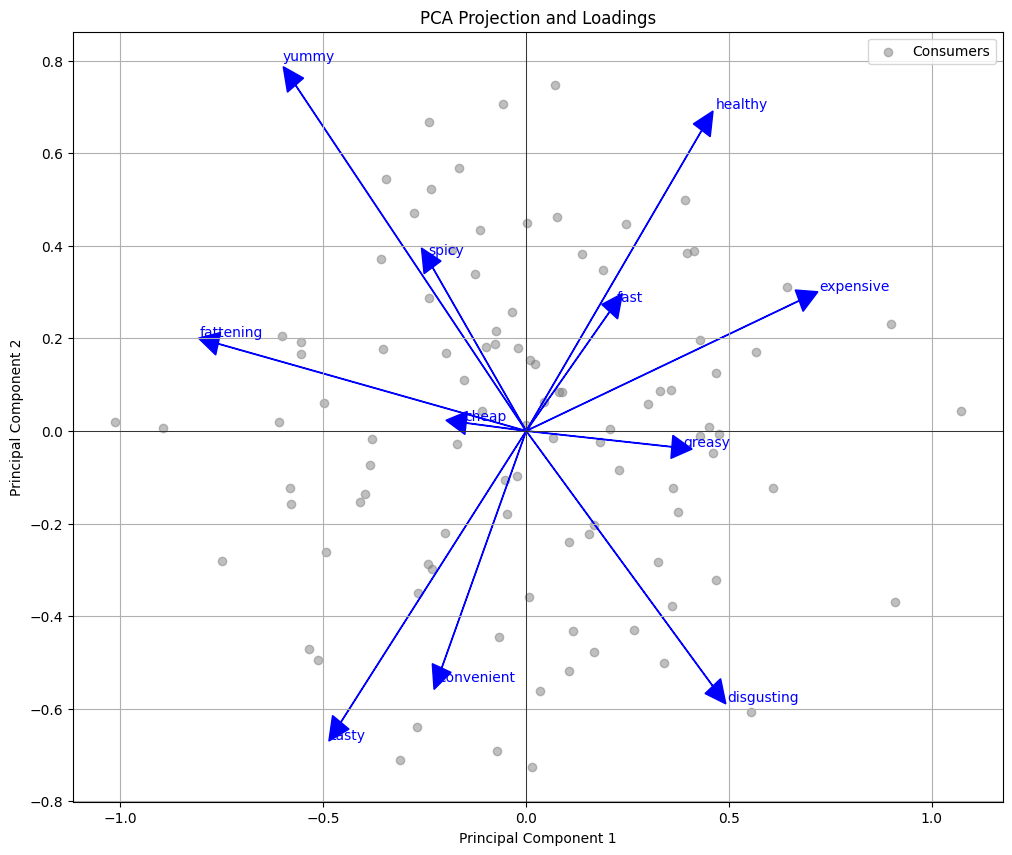

In [277]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text


pca_results = MD_pca  
loadings = pca.components_.T  # PCA loadings
feature_names = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']  # Replace with actual feature names

# Create a scatter plot of the PCA results
plt.figure(figsize=(12, 10))
plt.scatter(pca_results[:, 0], pca_results[:, 1], color='grey', alpha=0.5, label='Consumers')

# Add arrows for the principal components
texts = []
for i, component_name in enumerate(feature_names):
    # Adding arrows
    plt.arrow(0, 0, loadings[i, 0] * 1.5, loadings[i, 1] * 1.5,  # Slightly bigger size
              head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    # Add text for the principal components
    texts.append(plt.text(loadings[i, 0] * 1.6, loadings[i, 1] * 1.6, component_name, color='blue'))

# Use adjustText to handle text overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='blue'))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection and Loadings')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()





 In analyzing customer preferences for McDonald's, a PCA projection can reveal clusters of attributes that are rated similarly by customers, such as taste and convenience, and highlight how different segments of customers perceive these attributes. This helps in understanding the key factors that drive customer satisfaction and preferences.

## 4. Extracting Segments

###  Using k-Means

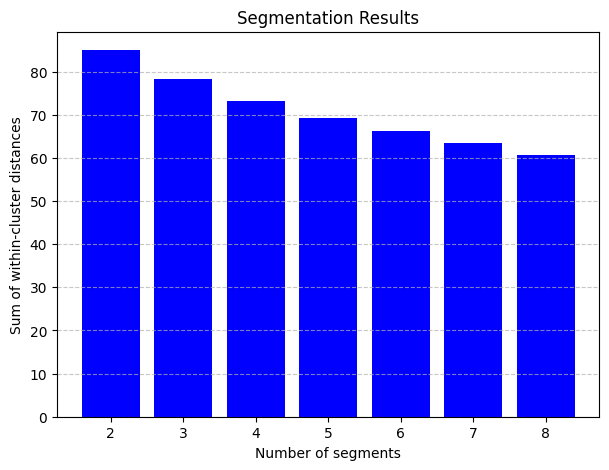

In [278]:

from sklearn.cluster import KMeans

# Set the random seed .
np.random.seed(1234)


# Set the number of repetitions
nrep = 10

# Create a list of the number of segments which will be used to create the KMeans models.
num_segments = range(2, 9)  

within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    # For each number of segments, create and fit a KMeans model to the data
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    
    # Calculate the within-cluster distances
    within_cluster_distances.append(kmeans.inertia_)
    
    # Store the KMeans model in the dictionary
    MD_km28[str(k)] = kmeans

# Plot the within-cluster distances as a bar graph
plt.figure(figsize=(7, 5))
plt.bar(num_segments, within_cluster_distances, color='blue')
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.xticks(num_segments) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


The sum of distances within market segments drops slowly as the number of market segments increases.

In [279]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

MD_x = np.random.rand(100, 11)  


In [280]:
# Performing k-Means clustering for k values ranging from 2 to 8
results = {}
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans_labels = kmeans_model.fit_predict(MD_x)
    results[str(k)] = kmeans_labels


In [281]:
# Calculating adjusted rand index for each k value
ari_values = []
for k1 in range(2, 9):
    ari_values.append([adjusted_rand_score(results[str(k1)], results[str(k2)]) for k2 in range(2, 9)])

# Convert ari_values to a NumPy array for easier plotting
ari_values = np.array(ari_values)



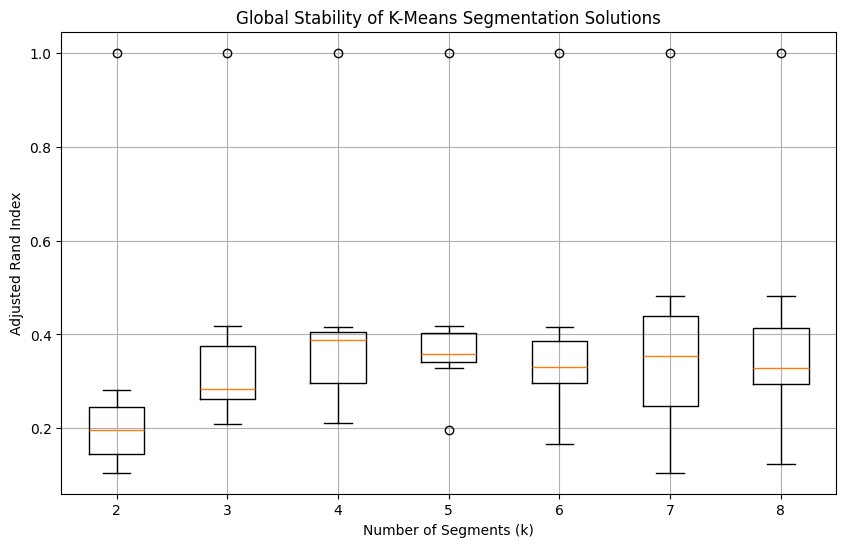

In [282]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(ari_values.T, labels=list(range(2, 9)))
plt.xlabel('Number of Segments (k)')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of K-Means Segmentation Solutions')
plt.grid(True)
plt.show()


Vertical boxplots show the stability distribution for each number of segments, with the thick black line representing the median. Higher stability is better. The box edges represent the interquartile range (IQR), and whiskers extend to 1.5 times the IQR, highlighting any outliers.

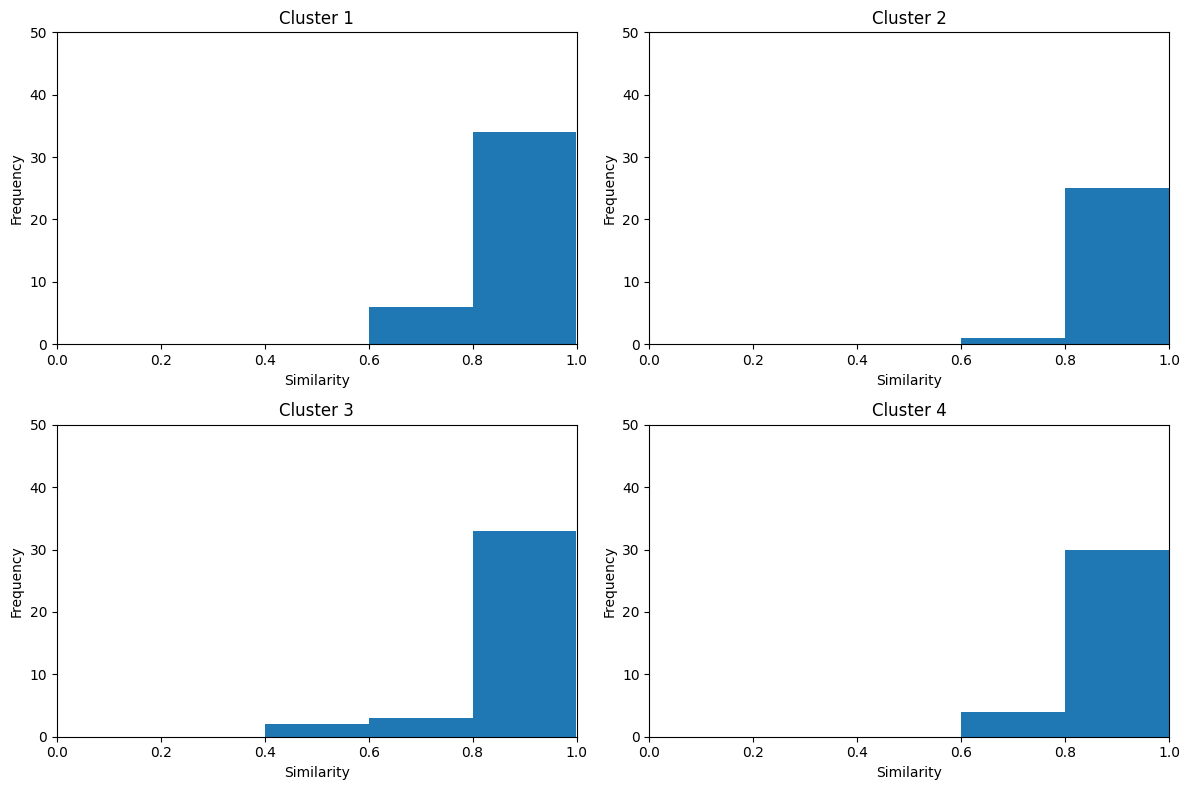

In [283]:

  # Define the range of values and the number of bins for the histogram.
range_values = (0, 1)
num_bins = 5  # Reduced the number of bins to make the bars larger
max_frequency = 50  # Adjusted the maximum frequency for better visibility

# Create a figure with subplots for each cluster.
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# For each cluster, calculate the similarities between the points in the cluster
# and the cluster centroid.
for i in range(1, 5):
    labels = MD_km28['4'].labels_
    similarities = MD_km28['4'].transform(MD_x)[:, i-1]  # Use the distance to the cluster centroid

    # Plot the histogram of the similarities.
    row = (i - 1) // 2
    col = (i - 1) % 2
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)

    # Set the labels for the x-axis and y-axis.
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')

    # Set the title for the subplot.
    axs[row, col].set_title(f'Cluster {i}')

    # Set the x-axis limits and the y-axis limits.
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    # Set the x-axis ticks.
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Tighten the layout of the figure.
plt.tight_layout()

# Show the plot.
plt.show()



                                  Gorge plot of the four-segment k-means solution 

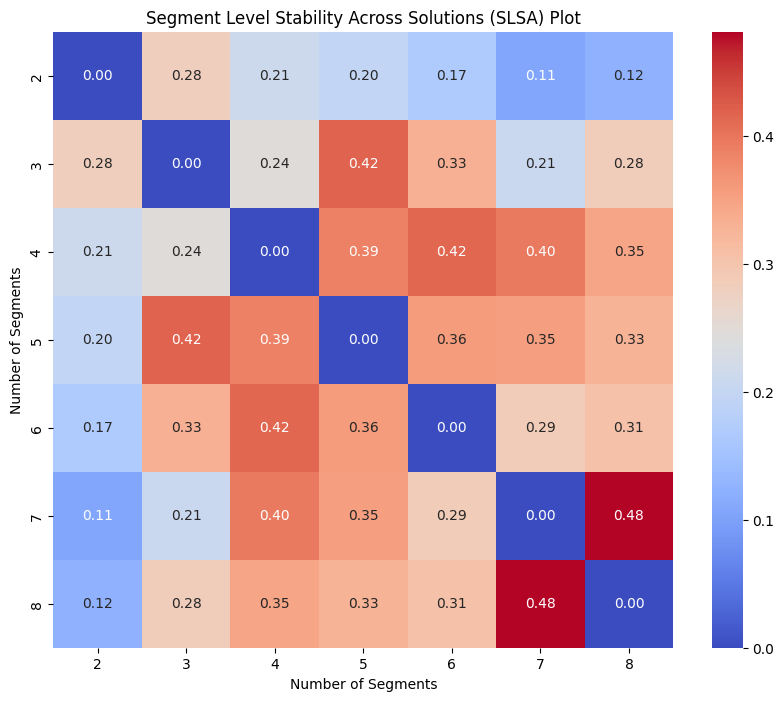

In [284]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Function to calculate SLSA matrix
def slsaplot(results, num_segments):
    num_k = len(num_segments)
    slsa_matrix = np.zeros((num_k, num_k))
    for i in range(num_k):
        for j in range(num_k):
            if i != j:
                slsa_matrix[i, j] = adjusted_rand_score(results[str(num_segments[i])], results[str(num_segments[j])])
    return slsa_matrix

# List of number of segments considered
num_segments = list(range(2, 9))

# Generate SLSA matrix
slsa_matrix = slsaplot(results, num_segments)

# Plot SLSA matrix
plt.figure(figsize=(10, 8))
sns.heatmap(slsa_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=num_segments, yticklabels=num_segments)
plt.xlabel('Number of Segments')
plt.ylabel('Number of Segments')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.show()


In [285]:
# Select the four-segment solution from the dictionary
MD_k4 = MD_km28['4']


In [286]:
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

# Calculate the distance of each point to its cluster center
def calculate_segment_stability(X, kmeans_model):
    distances = np.min(pairwise_distances_argmin_min(X, kmeans_model.cluster_centers_)[1])
    stability_scores = []
    for i in range(kmeans_model.n_clusters):
        cluster_points = X[kmeans_model.labels_ == i]
        if cluster_points.shape[0] > 0:
            cluster_distances = np.min(pairwise_distances_argmin_min(cluster_points, kmeans_model.cluster_centers_)[1])
            stability_scores.append(np.mean(cluster_distances))
        else:
            stability_scores.append(np.nan)
    return stability_scores

# Calculate the stability for the four-segment solution
stability_scores = calculate_segment_stability(MD, MD_k4)


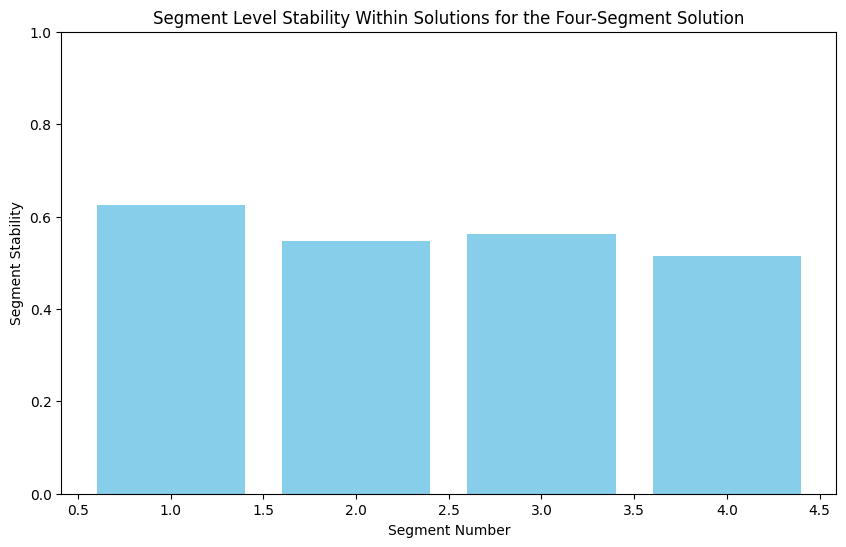

In [287]:
import matplotlib.pyplot as plt

# Define the number of segments
segments = [1, 2, 3, 4]

# Plot the stability scores
plt.figure(figsize=(10, 6))
plt.bar(segments, stability_scores, color='skyblue')
plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Level Stability Within Solutions for the Four-Segment Solution')
plt.show()



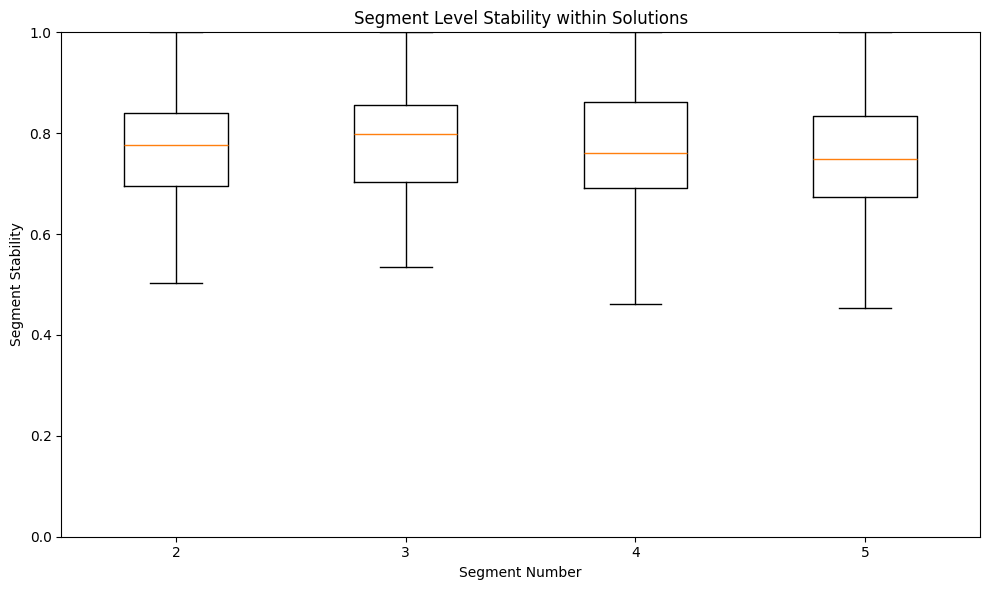

In [288]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define a list of segment solutions, from 2 to 5
segment_solutions = ["2", "3", "4", "5"]

# Create a dictionary to store the segment labels and similarities for each segment solution
segment_labels = {}
segment_similarities = {}


for segment in segment_solutions:
    # Predict the segment labels for the data
    segment_labels[segment] = MD_km28[segment].predict(MD)
    
    # Calculate the similarities between each observation and the cluster centroids
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

# Create a list to store the normalized segment stability values
segment_stability_values = []

for segment in segment_solutions:
    # Get the similarities for the current segment solution
    similarities = segment_similarities[segment]

    # Normalize the similarities to range from 0 to 1
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

# Create the boxplot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")

# Add x-ticks at the values in the `segment_solutions` list
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)

# Set the y-axis limits to 0 and 1
plt.ylim(0, 1)

plt.title("Segment Level Stability within Solutions")

# Adjust layout to ensure everything fits well
plt.tight_layout()

plt.show()


In [291]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import entropy

# Define the range of k-values (number of clusters) to evaluate
k_values = range(2, 9)

# Create an empty list to store the results for different k-values
MD_m28 = []


# Loop through each k-value
for k in k_values:
    # Create a KMeans model with the current k-value and fit it to the data in MD
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD)  # MD is assumed to be a NumPy array

    # Get the number of iterations the KMeans algorithm took to converge
    iter_val = model.n_iter_

    # Set 'converged' flag to True, as KMeans algorithm is guaranteed to converge
    converged = True

    # Calculate the negative log-likelihood (inertia) of the KMeans model
    log_likelihood = -model.inertia_

    # Get the number of samples and features in the MD data
    n_samples = MD.shape[0]  # Number of samples

    # Calculate the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k

    # Get the cluster labels assigned by the KMeans model
    labels = model.labels_

    # Count the number of samples in each cluster and calculate the probability of each cluster
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())

    # Calculate the entropy of the cluster probabilities as a measure of class uncertainty
    class_entropy = entropy(probs)

    # Calculate the Integrated Completed Likelihood (ICL) criterion using BIC and class entropy
    icl = bic - class_entropy

    # Append the evaluation metrics for the current k-value to the MD_m28 list
    MD_m28.append((iter_val, converged, k, k, log_likelihood, aic, bic, icl))

# Create a DataFrame from the list of evaluation metrics with appropriate column names
MD_m28_df = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

# Print the resulting DataFrame with the evaluation metrics for different k-values
print(MD_m28_df)


   iter  converged  k  k0     logLik         AIC         BIC         ICL
0     8       True  2   2 -88.295667  180.591335  185.801675  185.160640
1     9       True  3   3 -80.180327  166.360654  174.176164  173.096956
2     6       True  4   4 -74.268566  156.537131  166.957812  165.581104
3     5       True  5   5 -69.482329  148.964658  161.990509  160.391533
4     6       True  6   6 -66.911754  145.823507  161.454528  159.682173
5     5       True  7   7 -63.767412  141.534824  159.771015  157.854682
6     8       True  8   8 -62.173911  140.347821  161.189183  159.174036


In [99]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import entropy

# Assuming MD is a NumPy array or a pandas DataFrame

# Set a random seed for reproducibility
np.random.seed(1234)

# Define the range of k-values (number of clusters) to evaluate
k_values = range(2, 9)

# Create an empty list to store the results for different k-values
MD_m28 = []

# Loop through each k-value
for k in k_values:
    # Create a KMeans model with the current k-value and fit it to the data in MD
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD)  # Use MD directly, assuming MD is a NumPy array

    # Get the number of iterations the KMeans algorithm took to converge
    iter_val = model.n_iter_

    # Set 'converged' flag to True, as KMeans algorithm is guaranteed to converge
    converged = True

    # Store k-value in k_val and k0_val
    k_val = k
    k0_val = k

    # Calculate the negative log-likelihood (inertia) of the KMeans model
    log_likelihood = -model.inertia_

    # Get the number of samples and features in the MD data
    n_samples = MD.shape[0]

    # Calculate the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k

    # Get the cluster labels assigned by the KMeans model
    labels = model.labels_

    # Count the number of samples in each cluster and calculate the probability of each cluster
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())

    # Calculate the entropy of the cluster probabilities as a measure of class uncertainty
    class_entropy = entropy(probs)

    # Calculate the Integrated Completed Likelihood (ICL) criterion using BIC and class entropy
    icl = bic - class_entropy

    # Append the evaluation metrics for the current k-value to the MD_m28 list
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

# Create a DataFrame from the list of evaluation metrics with appropriate column names
MD_m28_df = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

# Print the resulting DataFrame with the evaluation metrics for different k-values
print(MD_m28_df)


   iter  converged  k  k0     logLik         AIC         BIC         ICL
0    10       True  2   2 -82.313956  168.627912  173.838253  173.148309
1     5       True  3   3 -76.019478  158.038955  165.854466  164.760250
2     8       True  4   4 -72.081401  152.162801  162.583482  161.223480
3     9       True  5   5 -68.770750  147.541500  160.567351  158.991635
4     7       True  6   6 -66.171941  144.343883  159.974904  158.198150
5     7       True  7   7 -62.750477  139.500955  157.737146  155.806450
6     6       True  8   8 -61.657533  139.315066  160.156427  158.183147


#### Using Mixtures of Distributions

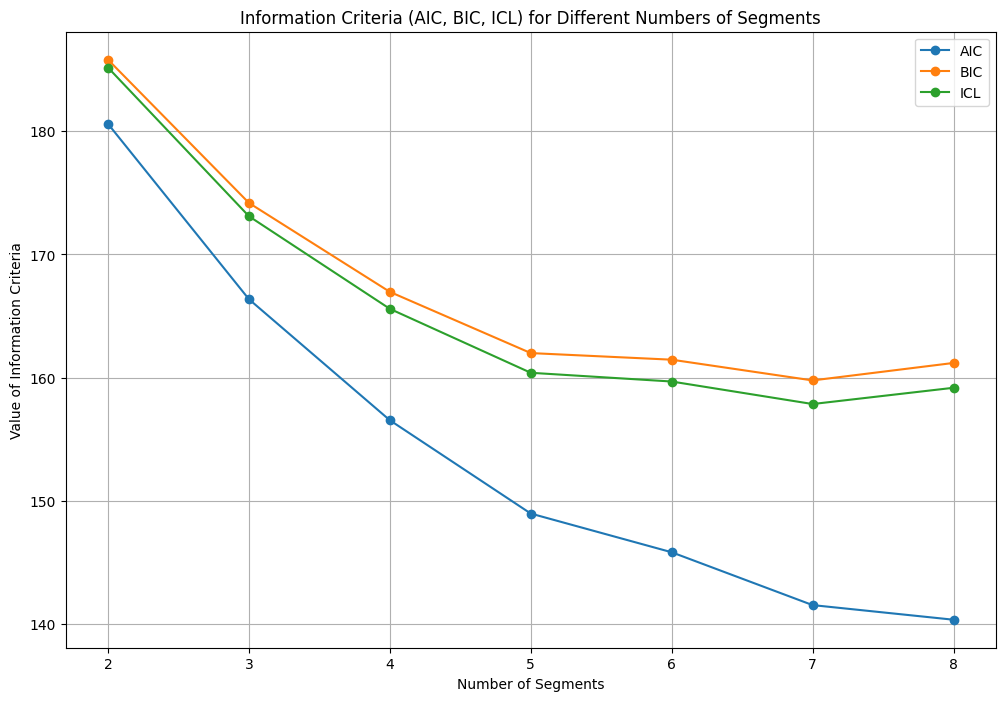

In [293]:
import matplotlib.pyplot as plt

# Assuming MD_m28_df is the DataFrame containing the evaluation metrics

# Extract the number of segments (k-values) and corresponding AIC, BIC, and ICL values from the DataFrame
num_segments = MD_m28_df["k"]
AIC_values = MD_m28_df["AIC"]
BIC_values = MD_m28_df["BIC"]
ICL_values = MD_m28_df["ICL"]

# Create a line plot for each information criterion, using the number of segments as x-axis
plt.plot(num_segments, AIC_values, marker='o', linestyle='-', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', linestyle='-', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', linestyle='-', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL) for Different Numbers of Segments')

# Add a legend to the plot to identify each line
plt.legend()

# Add grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()


In [294]:
from sklearn.mixture import GaussianMixture

# Set the number of clusters (segments) to 4
k = 4

# Perform KMeans clustering on the data MD with k=4 clusters
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

# Perform Gaussian Mixture Model (GMM) clustering on the data MD with k=4 components (clusters)
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

# Create a DataFrame 'results' to store the cluster assignments from KMeans and GMM
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Extract the subset of data (MD_m4) corresponding to GMM cluster 3 (mixture=3)
MD_m4 = MD[results['mixture'] == 3]

# Perform KMeans clustering on the subset data MD_m4 with k=4 clusters
k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

# Create a new DataFrame 'results_m4' to store the cluster assignments from KMeans on MD_m4
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

# Print the cross-tabulation of KMeans and GMM cluster assignments (results)
print(pd.crosstab(results['kmeans'], results['mixture']))

# Print the cross-tabulation of KMeans cluster assignments on MD_m4 (results_m4)
# and the original GMM cluster 3
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

#The code prints the cross-tabulations of cluster assignments to compare the
# results between KMeans and GMM as well as between KMeans on the subset and the
#original GMM cluster 3.

mixture   0   1   2   3
kmeans                 
0        22   0   1   0
1         0  24   0   0
2         1   0  30   0
3         0   0   0  22
kmeans  0  1  2  3
kmeans            
0       0  3  0  4
1       0  1  1  3
2       1  3  2  2
3       1  0  1  0


In [295]:
from sklearn.cluster import KMeans

# Define and fit the k-means model
kmeans = KMeans(n_clusters=4, random_state=1234)  # Use the appropriate number of clusters
kmeans.fit(MD)  # Replace MD with your actual data variable
kmeans_labels = kmeans.labels_  # Get the cluster labels


In [296]:
from sklearn.mixture import GaussianMixture

# Define and fit the GMM model
gmm = GaussianMixture(n_components=4, random_state=1234)  # Use the same number of components
gmm.fit(MD)  # Replace MD with your actual data variable
gmm_labels = gmm.predict(MD)  # Get the cluster labels


In [297]:
from sklearn.mixture import GaussianMixture

# Define and fit the GMM model
gmm = GaussianMixture(n_components=4, random_state=1234)  # Use the same number of components
gmm.fit(MD)  # Replace MD with your actual data variable
gmm_labels = gmm.predict(MD)  # Get the cluster labels


In [298]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Create a DataFrame to compare the cluster assignments
comparison_df = pd.DataFrame({
    'kmeans': kmeans_labels,
    'mixture': gmm_labels
})

# Calculate and print the confusion matrix to compare cluster assignments
conf_matrix = confusion_matrix(kmeans_labels, gmm_labels)
print("Confusion Matrix:")
print(conf_matrix)

# To display in a more interpretable format, use pd.crosstab
comparison_table = pd.crosstab(comparison_df['kmeans'], comparison_df['mixture'])
print("\nCluster Comparison Table:")
print(comparison_table)


Confusion Matrix:
[[22  0  1  0]
 [ 0 24  0  0]
 [ 1  0 30  0]
 [ 0  0  0 22]]

Cluster Comparison Table:
mixture   0   1   2   3
kmeans                 
0        22   0   1   0
1         0  24   0   0
2         1   0  30   0
3         0   0   0  22


In [299]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Models
gmm_model_4a = GaussianMixture(n_components=4, random_state=1234)
gmm_model_4a.fit(MD)  # Replace MD with your actual data variable
log_likelihood_4a = gmm_model_4a.score(MD) * len(MD)

gmm_model_4 = GaussianMixture(n_components=4, random_state=1234)
gmm_model_4.fit(MD)  # Replace MD with your actual data variable
log_likelihood_4 = gmm_model_4.score(MD) * len(MD)

print(f'Log-Likelihood for MD.m4a: {log_likelihood_4a}')
print(f'Log-Likelihood for MD.m4: {log_likelihood_4}')


Log-Likelihood for MD.m4a: -32.946375352645155
Log-Likelihood for MD.m4: -32.946375352645155


In [300]:
reversed_mcdonalds = data.iloc[::-1].reset_index(drop=True)

# Print the reversed DataFrame
print("Reversed Order of Frequency Table:")
print(reversed_mcdonalds)

Reversed Order of Frequency Table:
     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes    Yes   No    No    No       Yes   
1      Yes        Yes    No        No     No  Yes   Yes   Yes        No   
2      Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes     No   No   Yes   Yes        No   
4       No        Yes    No       Yes    Yes   No    No    No       Yes   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes  Yes   Yes    No        No   
1449   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
1450    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
1451   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
1452    No        Yes    No       Yes     No  Yes   Yes    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  

In [301]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)


like_n_counts = data['Like.n'].value_counts()


print(like_n_counts)


Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [134]:
pip install pasty

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pasty (from versions: none)
ERROR: No matching distribution found for pasty

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [302]:
# Import the 'dmatrices' function from the 'patsy' library
from patsy import dmatrices

# Get the column names for the first 11 columns in the 'data'
#DataFrame and store them as 'independent_vars'
independent_vars = data.columns[0:11]

# Join the column names with a '+' sign to create the formula string for the regression model
formula_str = ' + '.join(independent_vars)

# Prepend 'Like ~ ' to the formula string to specify that 'Like' is the
#dependent variable in the regression model
formula_str = 'Like ~ ' + formula_str

# Use the 'dmatrices' function to create the design matrices for
#the regression model specified by 'formula_str'
# The result will be the design matrix for the dependent variable
#'Like', which is stored in 'f'
f = dmatrices(formula_str, data=data)[1]

# Print the design matrix 'f', which represents the dependent variable
#'Like' and its corresponding independent variables
print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [303]:
from patsy import dmatrix

# Set a random seed for reproducibility
np.random.seed(1234)

# Create the design matrix 'X' from the independent variables using 'dmatrix'
X = dmatrix(f.design_info, data=data)

# Create the design matrix 'y' for the dependent variable 'Like'
y = dmatrix('Like', data=data)

# Set the number of components (clusters) for the Gaussian Mixture Model
n_components = 2

# Set the number of initializations for the model
n_init = 10

# Set the verbose mode for the model fitting process
verbose = False

# Set the number of repetitions for the EM algorithm
n_rep = 10

# Create the Gaussian Mixture Model with specified settings
model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)

# Fit the model to the data 'X' and 'y'
MD_reg2 = model.fit(X, y)

# Print the Gaussian Mixture Model object 'MD_reg2', which contains information
#about the fitted model
print(MD_reg2)

# Calculate the cluster sizes (number of data points in each cluster) using 'bincount'
cluster_sizes = np.bincount(model.predict(X))

# Print the cluster sizes for each cluster
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


## 5. Profiling Segments

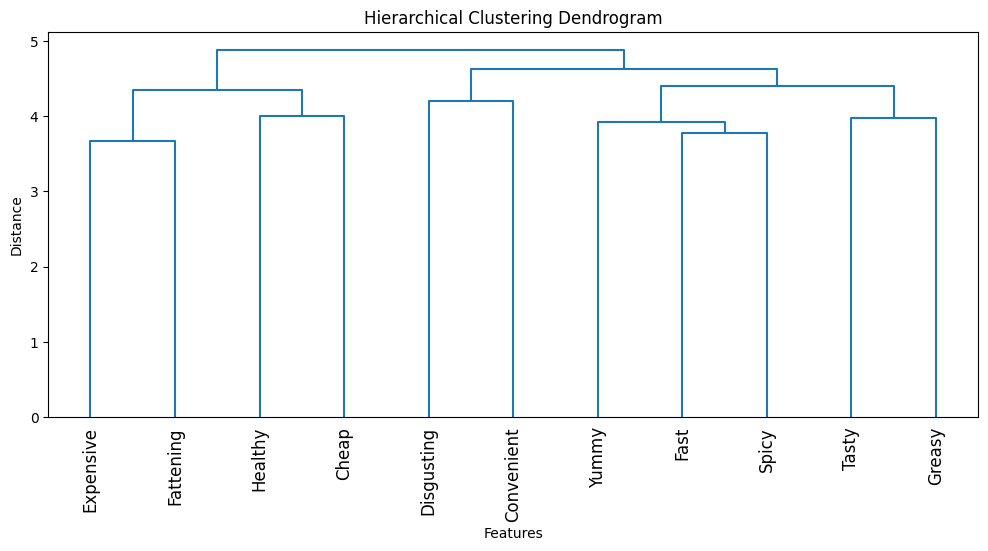

In [319]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Example data: Replace with your actual data
# MD_x = np.array(...)  # Your data

# Custom feature labels (replace with your actual labels)
feature_labels = ['Disgusting', 'Healthy', 'Expensive', 'Tasty', 'Cheap',
                  'Fast', 'Greasy', 'Fattening', 'Spicy', 'Convenient', 'Yummy']

# Transpose the data matrix
MD_x_transposed = MD_x.T

# Compute the distance matrix
distance_matrix = pdist(MD_x_transposed)

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linkage_matrix, labels=feature_labels, orientation='top')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


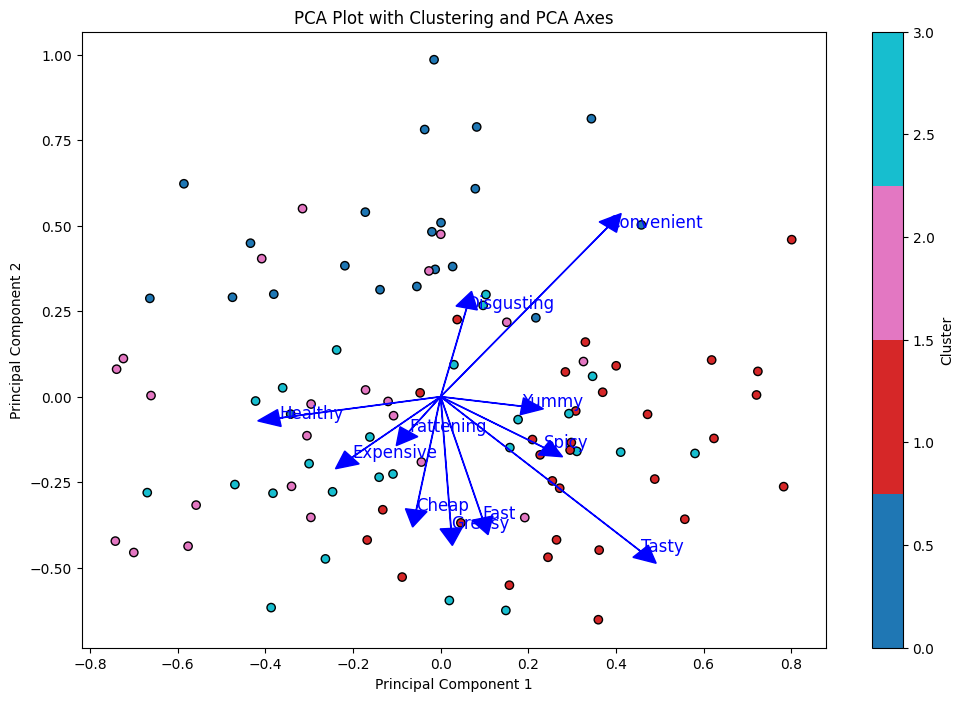

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Example data: Replace with your actual data
# MD_x = np.array(...)  # Your data

# Custom feature labels (replace with your actual labels)
feature_labels = ['Disgusting', 'Healthy', 'Expensive', 'Tasty', 'Cheap',
                  'Fast', 'Greasy', 'Fattening', 'Spicy', 'Convenient', 'Yummy']

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(MD_x)
labels = kmeans.labels_

# Create a DataFrame for plotting
pca_df = pd.DataFrame(MD_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Define a color palette
palette = plt.get_cmap('tab10', len(np.unique(labels)))

# Plot PCA results with clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap=palette, edgecolor='k')  # Colorful scatter plot
plt.colorbar(scatter, label='Cluster')

# Add PCA component vectors in blue
components = pca.components_.T
for i, (comp1, comp2) in enumerate(zip(components[:, 0], components[:, 1])):
    plt.arrow(0, 0, comp1 * max(pca_df['PC1']),
              comp2 * max(pca_df['PC2']),
              head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    plt.text(comp1 * max(pca_df['PC1']), comp2 * max(pca_df['PC2']),
             feature_labels[i], color='blue', fontsize=12)

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Clustering and PCA Axes')

plt.show()


## 6. Describing Segments

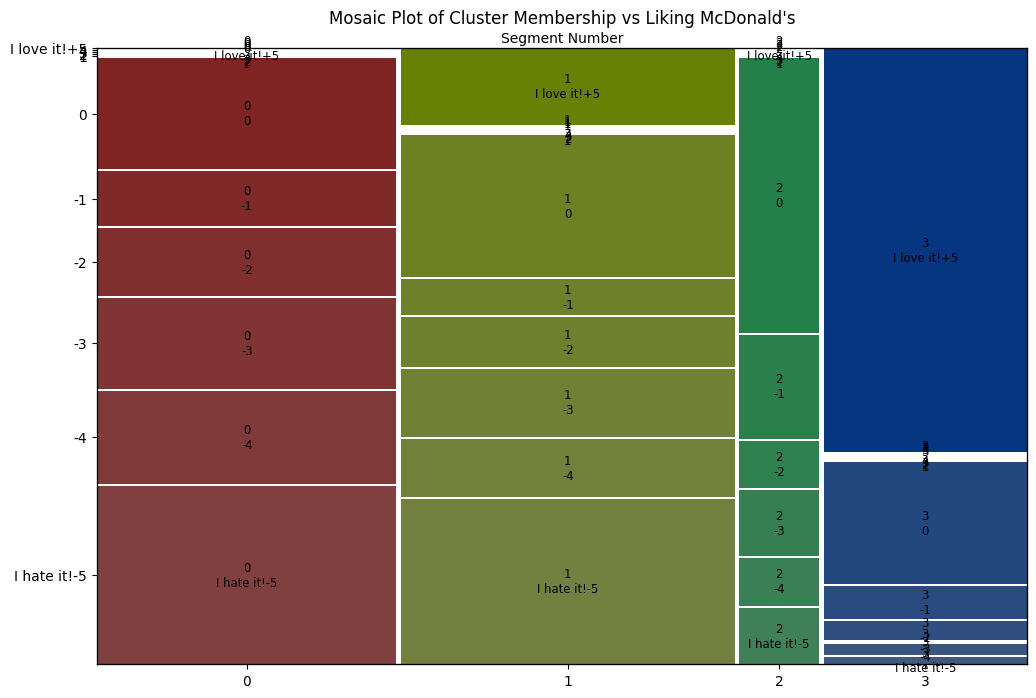

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder



# List of categorical columns to label encode
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

# Define a function to perform label encoding for categorical variables
def labelling(df, columns):
    for column in columns:
        df[column] = LabelEncoder().fit_transform(df[column])
    return df

# Apply label encoding
data = labelling(data, cat)

# Select only the columns representing the categorical variables
df_eleven = data[cat]

# Perform KMeans clustering with 4 clusters using the categorical variables
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)

# Add the cluster number to the original data
data['cluster_num'] = kmeans.labels_

# Verify the 'Like' column values and update column names accordingly
like_values = ['I hate it!-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', 'I love it!+5']

# Create a crosstabulation between the cluster number and the 'Like' variable
crosstab = pd.crosstab(data['cluster_num'], data['Like'])

# Reorder the columns to display the 'Like' variable in the proper order
crosstab = crosstab.reindex(columns=like_values, fill_value=0)

# Set the figure size
plt.rcParams['figure.figsize'] = (12, 8)

# Display the mosaic plot visualizing the association between cluster membership and the 'Like' variable
mosaic(crosstab.stack(), title='')
plt.xlabel('Segment Number')
plt.ylabel('Liking McDonald\'s')
plt.title('Mosaic Plot of Cluster Membership vs Liking McDonald\'s')

plt.show()


Length of data: 400
Length of cluster labels: 400
Gender   Female  Male
Cluster              
0            51    51
1            49    49
2            52    52
3            48    48


<Figure size 1000x700 with 0 Axes>

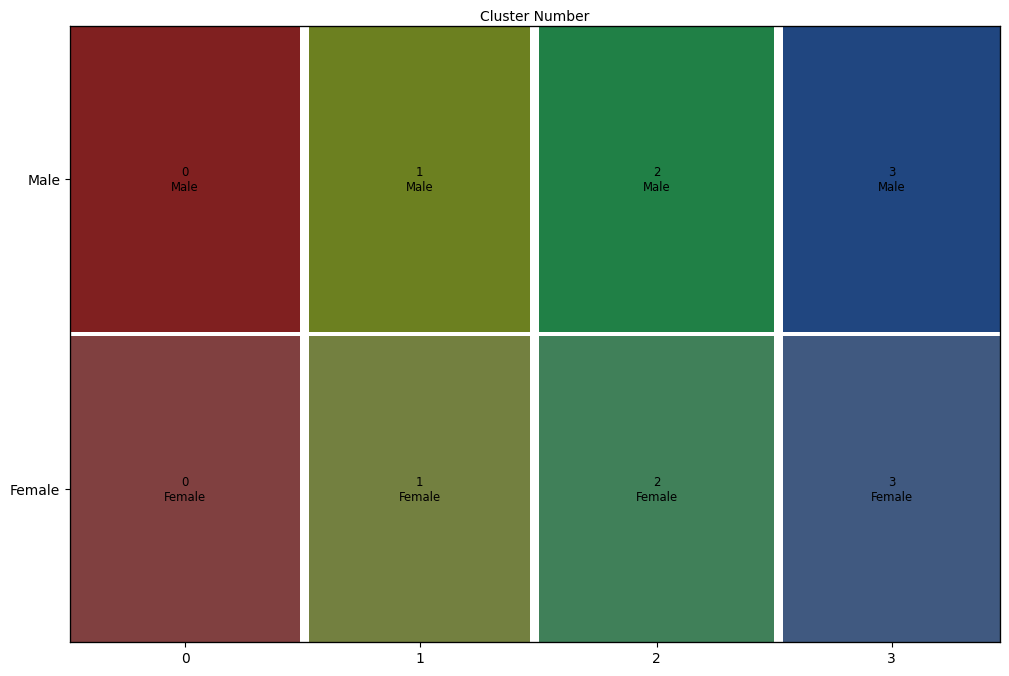

In [310]:
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.cluster import KMeans

data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female'] * 100,
    'Feature1': range(400),
    'Feature2': range(400)
})

# Perform clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
data_features = data[['Feature1', 'Feature2']]
kmeans.fit(data_features)
k4 = kmeans.labels_

print(f"Length of data: {len(data)}")
print(f"Length of cluster labels: {len(k4)}")

if len(data) == len(k4):
    data['Cluster'] = k4
else:
    raise ValueError("Mismatch between the number of data rows and cluster labels.")

# Convert Gender to string
data['Gender'] = data['Gender'].astype(str)

# Create crosstab
ct = pd.crosstab(data['Cluster'], data['Gender'])
print(ct)

# Plot mosaic
plt.figure(figsize=(10, 7))
mosaic(ct.stack(), gap=0.01)
plt.xlabel('Cluster Number')
plt.ylabel('Gender')

plt.show()


In [311]:
data=pd.read_csv("mcdonalds.csv")

In [251]:
print(data.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  Cluster Number  
0         No   -3   61  Every three months  Female               0  
1         No   +2   51  Every three months  Female               2  
2         No   +1   62  Every three months  Female               0  
3        Yes   +4   69         Once a week  Female               6  
4         No   +2   49        Once a month    Male               2  


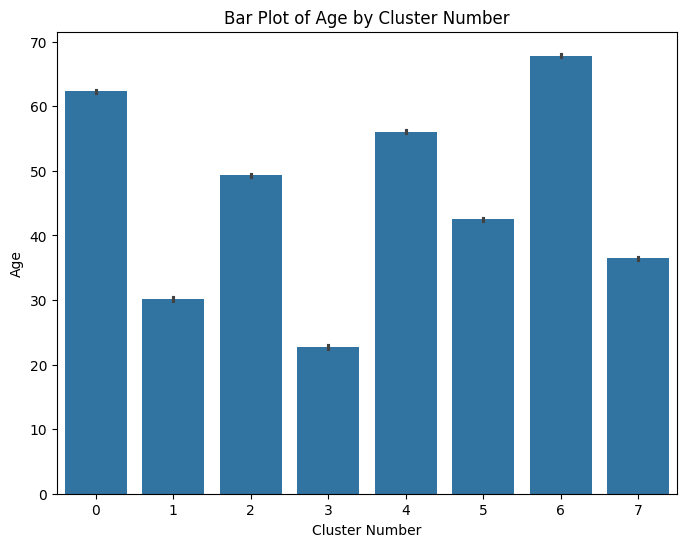

In [312]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


# Select features for clustering
features = data[['Age']]

# Define the number of clusters
num_clusters = 8

# Initialize and fit the k-means algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(features)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
data['Cluster Number'] = cluster_labels

# Verify the DataFrame
print(data.head())

# Create a bar plot to show the distribution of 'Age' across clusters
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster Number', y='Age', data=data)
plt.xlabel('Cluster Number')
plt.ylabel('Age')
plt.title('Bar Plot of Age by Cluster Number')
plt.show()


## 7. Selecting (the) Target Segment(s)

### Calculating the mean for

#### 1. Visit frequency

In [313]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visitFreq = data.groupby('Cluster Number')['VisitFrequency'].mean()
visitFreq = visitFreq.to_frame().reset_index()
visitFreq

,Cluster Number,VisitFrequency
0,0,2.443820
1,1,2.843243
2,2,2.674641
3,3,2.635468
4,4,2.477733
5,5,2.742138
6,6,2.755814
7,7,2.650538


#### 2. Like

In [314]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
like = data.groupby('Cluster Number')['Like'].mean()
like = like.to_frame().reset_index()
like

,Cluster Number,Like
0,0,5.112360
1,1,4.064865
2,2,4.555024
3,3,4.660099
4,4,4.769231
5,5,4.566038
6,6,4.581395
7,7,4.725806


#### 3. Gender

In [315]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
gender = data.groupby('Cluster Number')['Gender'].mean()
gender = gender.to_frame().reset_index()
gender

,Cluster Number,Gender
0,0,0.471910
1,1,0.481081
2,2,0.435407
3,3,0.463054
4,4,0.417004
5,5,0.515723
6,6,0.453488
7,7,0.446237


In [261]:
clusters = gender.merge(like, on='Cluster Number', how='left').merge(visitFreq, on='Cluster Number', how='left')
clusters

,Cluster Number,Gender,Like,VisitFrequency
0,0,0.471910,5.112360,2.443820
1,1,0.481081,4.064865,2.843243
2,2,0.435407,4.555024,2.674641
3,3,0.463054,4.660099,2.635468
4,4,0.417004,4.769231,2.477733
5,5,0.515723,4.566038,2.742138
6,6,0.453488,4.581395,2.755814
7,7,0.446237,4.725806,2.650538


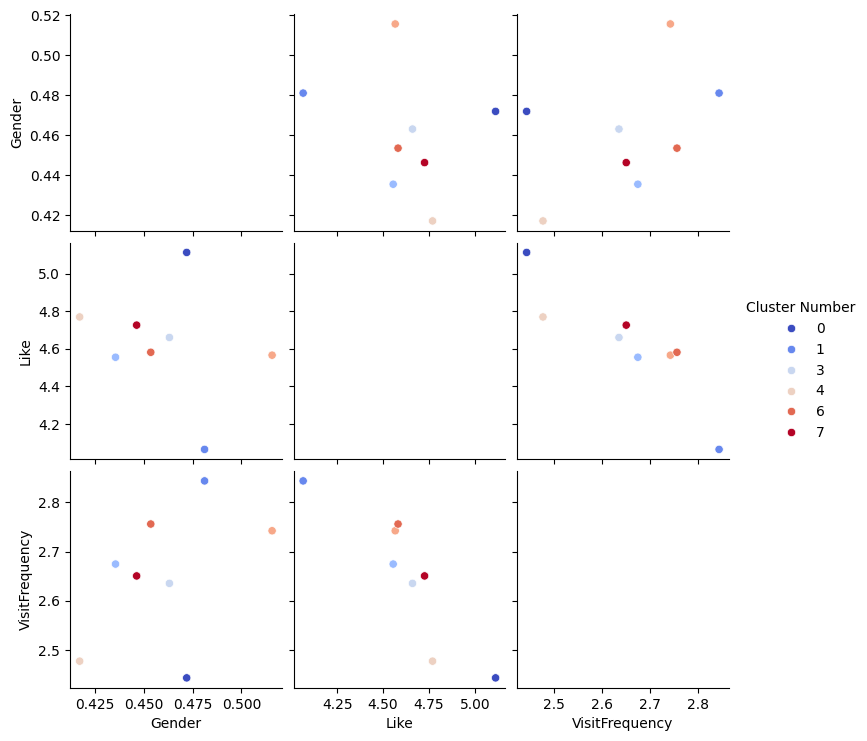

In [262]:
sns.pairplot(clusters, hue='Cluster Number', palette='coolwarm')
plt.show()

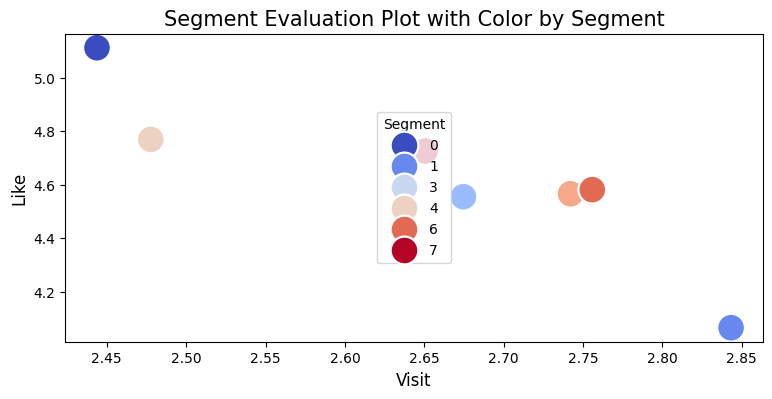

In [263]:
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=clusters, s=400, hue='Cluster Number', palette='coolwarm')
plt.title("Segment Evaluation Plot with Color by Segment", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.legend(title='Segment', loc='center')
plt.show()